In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('crosstables_game_results.csv', header=None)

In [7]:
df

,0,1,2,3,4,5,6,7
0,49957,2000-01-13,4,2091,486,360,John Karris,Steven Alexander
1,49958,2000-01-13,4,1389,402,398,John Karris,Trip Payne
2,49966,2000-01-13,5,1389,523,353,Dennis Kaiser,Trip Payne
3,49996,2000-01-13,33,4,451,353,Joey Mallick,John Karris
4,49997,2000-01-13,33,839,356,350,Joey Mallick,Albert Hahn
...,...,...,...,...,...,...,...,...
864355,1982594,2020-03-15,2037,27230,500,282,Ben Greenwood,Marianne Baush
864356,1982595,2020-03-15,2193,3232,416,360,David B Carlson,Sandra Loiterstein
864357,1982596,2020-03-15,2193,2037,456,419,David B Carlson,Ben Greenwood
864358,1982597,2020-03-15,3232,27230,423,205,Sandra Loiterstein,Marianne Baush


In [12]:
df.sample(frac=1).to_csv('shuffle_5.csv',header=False,index=False)

In [3]:
df = df.rename(columns={
    0:'game_id',
    1:'date',
    2:'id_1',
    3:'id_2',
    4:'score_1',
    5:'score_2',
    6:'player_1',
    7:'player_2'
})

In [4]:
df['year'] = df['date'].apply(lambda x:x[:4])
df['spread'] = df['score_1']-df['score_2']

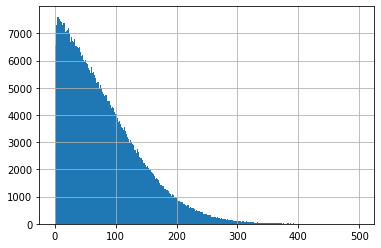

In [5]:
fig,ax = plt.subplots()
df['spread'].hist(bins=np.arange(-0.5,500.5))

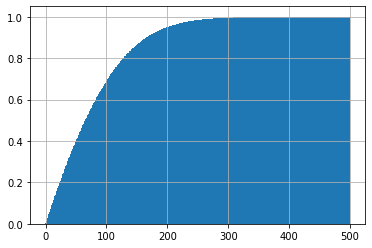

In [6]:
df['spread'].hist(cumulative=True, bins=np.arange(-0.5,500.5), density=1)

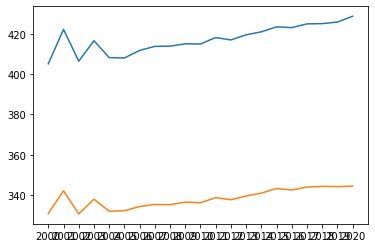

In [7]:
fig, ax = plt.subplots()
ax.plot(df.groupby('year')['score_1'].mean())
ax.plot(df.groupby('year')['score_2'].mean())

In [ ]:
Calculate the CDF for all games

In [14]:
margin_cdf = {}

for i in range(0,500):
    margin_cdf[i] = 1-sum(df['spread']>i)/len(df)

KeyboardInterrupt: 

Spreads have gotten wider as the years have gone by - 200 used to be the 95.8% spread mark, but is now 94.1% or so

In [18]:
for yr in range(2000,2021):
    sub_df = df[df['year']==str(yr)]
    print(yr,len(sub_df),sum(sub_df['spread']>=200)/len(sub_df))

2000 12117 0.03829330692415615
2001 4554 0.05665349143610013
2002 14931 0.04226106757752327
2003 7958 0.04787635084192008
2004 20304 0.04348896769109535
2005 35437 0.04173603860371928
2006 45708 0.045156208978734576
2007 62262 0.04725193536988854
2008 69098 0.049538336854901735
2009 71812 0.05013089734306244
2010 69641 0.04860642437644491
2011 58925 0.05206618582944421
2012 55638 0.05082857040152414
2013 57930 0.05325392715346108
2014 55739 0.05315847072965069
2015 45924 0.055700722933542376
2016 41590 0.055494109160855974
2017 42527 0.05577633033131893
2018 44288 0.05570357658959538
2019 40877 0.05851701445800817
2020 7100 0.06718309859154929


In [21]:
df.loc[df['year']>'2018']

,game_id,date,id_1,id_2,score_1,score_2,player_1,player_2,year,spread
816383,1928423,2019-01-01,10156,17680,460,334,Leesa Berahovich,Adam Ginzberg,2019,126
816384,1928424,2019-01-01,10156,17680,445,410,Leesa Berahovich,Adam Ginzberg,2019,35
816385,1928425,2019-01-01,17680,1589,563,283,Adam Ginzberg,John Wiley,2019,280
816386,1928421,2019-01-01,10156,6,454,382,Leesa Berahovich,Robin Levin,2019,72
816387,1928419,2019-01-01,10156,262,393,338,Leesa Berahovich,Andrea Carla Michaels,2019,55
...,...,...,...,...,...,...,...,...,...,...
864355,1982594,2020-03-15,2037,27230,500,282,Ben Greenwood,Marianne Baush,2020,218
864356,1982595,2020-03-15,2193,3232,416,360,David B Carlson,Sandra Loiterstein,2020,56
864357,1982596,2020-03-15,2193,2037,456,419,David B Carlson,Ben Greenwood,2020,37
864358,1982597,2020-03-15,3232,27230,423,205,Sandra Loiterstein,Marianne Baush,2020,218
